## Data Visualization

A function that takes as input a data frame, vector, or matrix, and produces a figure is considered **data visualization**. The goal of visualizing a dataset is to quickly understand one to two aspects of how variables are distributed, how the values of two or more variables are associated with one another, and more generally to understand one aspect of the data you collected. 

We will explore (i) data types and (ii) building the three foundatioanl data visualizations: a histogram, boxplot, scatterplot.

### Data types

Consider a single vector $v$ located inside a data frame $\mathcal{D}$. 
The **data type** for this vector $v$ depends on how two values in this vector, say $v_{1}$ and $v_{2}$, can be compared to one another, 

### Nominal data

Nominal data, often called categorical data, contains a set of categories that cannot be compared to one another numeircally. That is, for two nominal values $v_{1}$ and $v_{2}$ we cannot place between them a less than, less than or equal to, greater than, greater than or equal to, or an equal. 

For example, the primary colors are noominal data. They cannot be ranked, they cannot be compared.

### Ordinal data

Ordinal data contains a set of values that can be ranked, however there is not a notation of distance between two values. For example, for two ordinal values values $v_{1}$ and $v_{2}$ we can place between them a less than, less than or equal to, greater than, greater than or equal to, or an equal symbol, but the quantity $v_{2}$ - $v_{1}$ has little meaning.

An example the CDC gives is stages of cancer. The stages of cancer can be ranked but the severity between them may not be informative. 

### Interval data

Two values that are considered interval data if they can be compared to one another and there is a natural notion of distance between the two.  

For example, age computed as the number of years from one's data of birth to today is interval data. We can make a statement like "patient one is X years older than patient two".


### Ratio-scale data 

Data is considered to be on a ratio-scale if (i) the data is interval type and (ii) there is a natural zero for this data that indiciates the complete absence of some quantity. 
For example, number of virus particles in a patient.

### Visualizing categorical data - Barplot

The barplot is the most common way to represent nominal or catgorical data. 
Every category is enumerated on the horizontal axis and on the y-axis is the frequency of each category. 

#### Data 
For our example we will use a German Health Study, conducted in 1998, that asked patients for three pieces of information: (i) The number of visits they made to a physician in the year 1998, whether the patient reported at the time of the survey if they are in bad health, and thir age at the time of survey. 

In [3]:
d = read.csv("badhealth.csv")
head(d)

,X,numvisit,badh,age
,<int>,<int>,<int>,<int>
1,1,30,0,58
2,2,20,0,54
3,3,16,0,44
4,4,20,0,57
5,5,15,0,33
6,6,15,0,28


       X             numvisit           badh              age       
 Min.   :   1.0   Min.   : 0.000   Min.   :0.00000   Min.   :20.00  
 1st Qu.: 282.5   1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:28.00  
 Median : 564.0   Median : 1.000   Median :0.00000   Median :35.00  
 Mean   : 564.0   Mean   : 2.353   Mean   :0.09938   Mean   :37.23  
 3rd Qu.: 845.5   3rd Qu.: 3.000   3rd Qu.:0.00000   3rd Qu.:46.00  
 Max.   :1127.0   Max.   :40.000   Max.   :1.00000   Max.   :60.00  

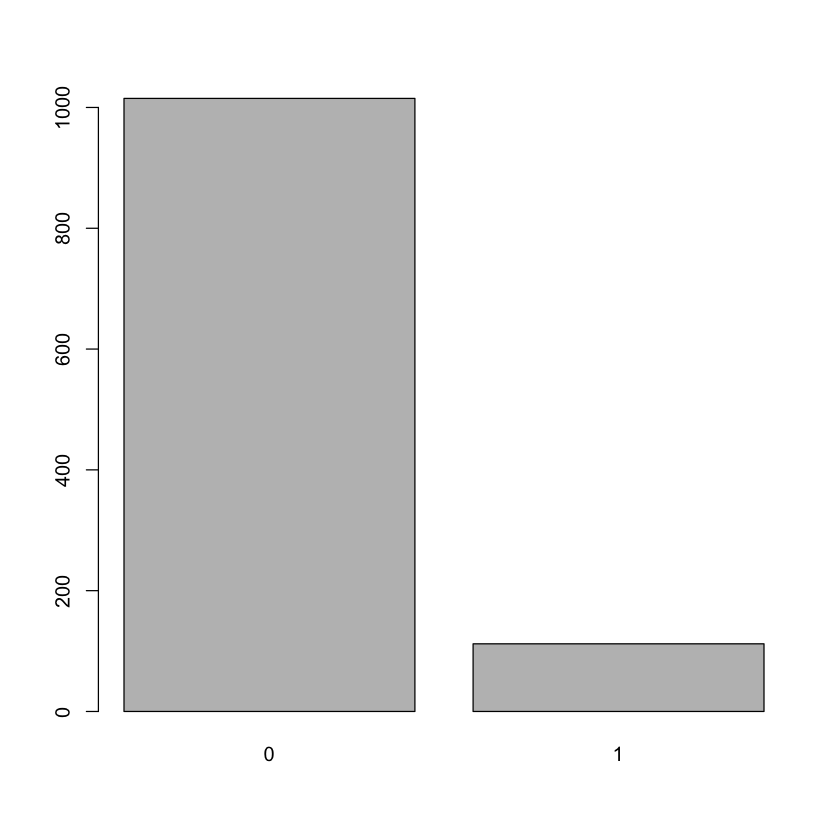

In [7]:
bad_health_counts =xtabs(~d$badh)
barplot(bad_health_counts)

### Visualizing interval data startified by a category.  

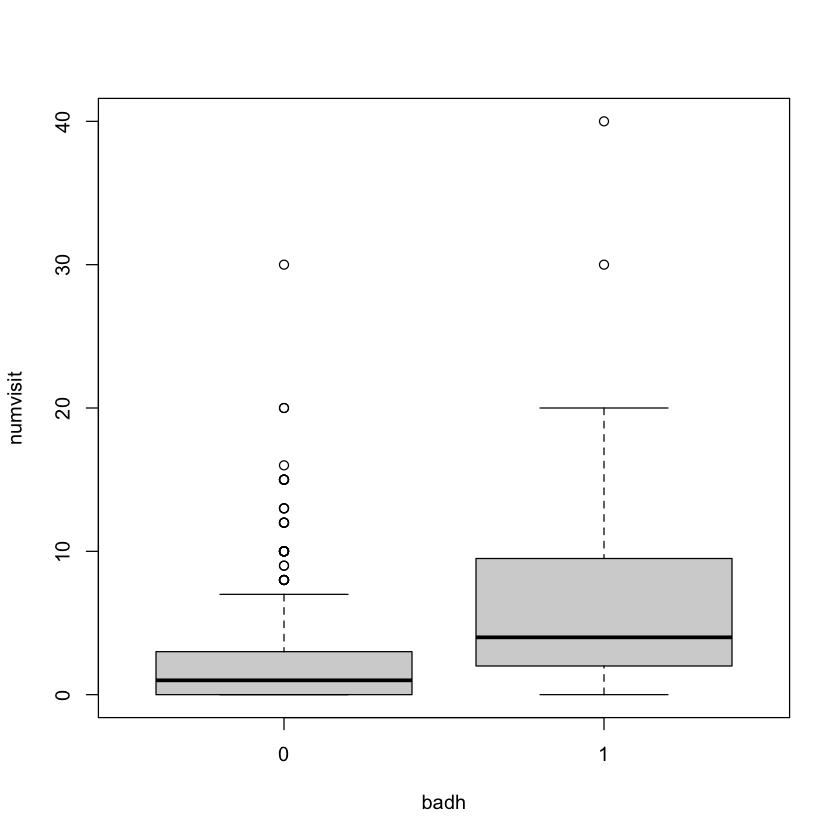

In [8]:
boxplot( numvisit~badh, data=d )